# Description of Dataset
# Heart Disease Prediction
age: Age of the patient (in years).
sex: Sex of the patient (1 = male, 0 = female).
cp: Chest pain type (4 values):
0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic
trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
chol: Serum cholesterol in mg/dl.
fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
restecg: Resting electrocardiographic results (values 0, 1, 2):
0: Normal
1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: Maximum heart rate achieved.
exang: Exercise induced angina (1 = yes; 0 = no).
oldpeak: ST depression induced by exercise relative to rest ('ST' refers to the segment on an ECG).
slope: The slope of the peak exercise ST segment (values 0, 1, 2):
0: Upsloping
1: Flat
2: Downsloping
ca: Number of major vessels (0-3) colored by fluoroscopy.
thal: Thalassemia (3 values):
1: Normal
2: Fixed defect
3: Reversible defect
target: Diagnosis of heart disease (1 = heart disease; 0 = no heart disease).
These columns represent various patient attributes and clinical measurements used to predict the presence of heart disease.

In [1]:
import pandas as pd
import numpy as np
import pickle as pk

In [3]:
df= pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,230,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,280,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,290,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,270,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,260,1,0.6,2,0,2,1


In [5]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.size

4620

In [8]:
df.shape

(330, 14)

In [9]:
Xb = df['sex'].value_counts()
print('Male indicates as 1 and Female indicates as 0')
print(Xb)


Male indicates as 1 and Female indicates as 0
sex
1    216
0    114
Name: count, dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       330 non-null    int64  
 1   sex       330 non-null    int64  
 2   cp        330 non-null    int64  
 3   trestbps  330 non-null    int64  
 4   chol      330 non-null    int64  
 5   fbs       330 non-null    int64  
 6   restecg   330 non-null    int64  
 7   thalach   330 non-null    int64  
 8   exang     330 non-null    int64  
 9   oldpeak   330 non-null    float64
 10  slope     330 non-null    int64  
 11  ca        330 non-null    int64  
 12  thal      330 non-null    int64  
 13  target    330 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 36.2 KB


In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
df.notnull().sum()

age         330
sex         330
cp          330
trestbps    330
chol        330
fbs         330
restecg     330
thalach     330
exang       330
oldpeak     330
slope       330
ca          330
thal        330
target      330
dtype: int64

In [13]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
df.notna().sum()

age         330
sex         330
cp          330
trestbps    330
chol        330
fbs         330
restecg     330
thalach     330
exang       330
oldpeak     330
slope       330
ca          330
thal        330
target      330
dtype: int64

In [15]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,51.993939,0.654545,2.090909,134.954545,240.851515,0.130303,0.430303,153.766667,0.300000,1.066061,1.284848,0.669697,0.981818,0.500000
std,11.903103,0.476238,1.096101,20.457556,54.406824,0.337148,0.507982,27.984963,0.458953,1.107970,0.704360,0.999995,1.013422,0.500759
min,16.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.250000,0.000000,1.000000,120.000000,203.250000,0.000000,0.000000,138.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,235.000000,0.000000,0.000000,156.000000,0.000000,0.950000,1.000000,0.000000,0.000000,0.500000
75%,60.000000,1.000000,3.000000,145.000000,271.000000,0.000000,1.000000,170.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,290.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,51.993939,0.654545,2.090909,134.954545,240.851515,0.130303,0.430303,153.766667,0.300000,1.066061,1.284848,0.669697,0.981818,0.500000
std,11.903103,0.476238,1.096101,20.457556,54.406824,0.337148,0.507982,27.984963,0.458953,1.107970,0.704360,0.999995,1.013422,0.500759
min,16.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.250000,0.000000,1.000000,120.000000,203.250000,0.000000,0.000000,138.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,3.000000,130.000000,235.000000,0.000000,0.000000,156.000000,0.000000,0.950000,1.000000,0.000000,0.000000,0.500000
75%,60.000000,1.000000,3.000000,145.000000,271.000000,0.000000,1.000000,170.000000,1.000000,1.600000,2.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,290.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Visulazing the DATa Set

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

<Figure size 5000x1000 with 0 Axes>

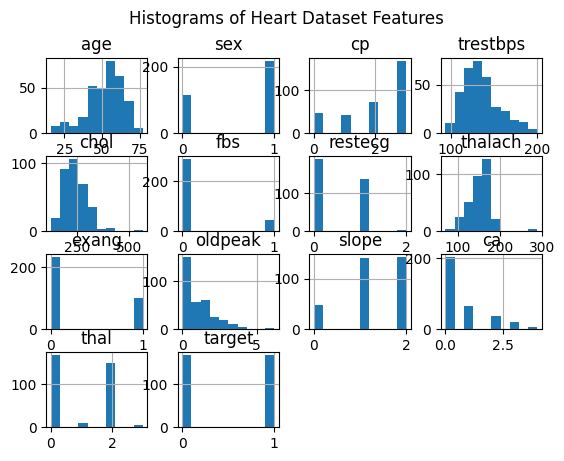

In [18]:
#Histogram
plt.figure(figsize=(50, 10))
df.hist()
plt.suptitle('Histograms of Heart Dataset Features')
plt.show()

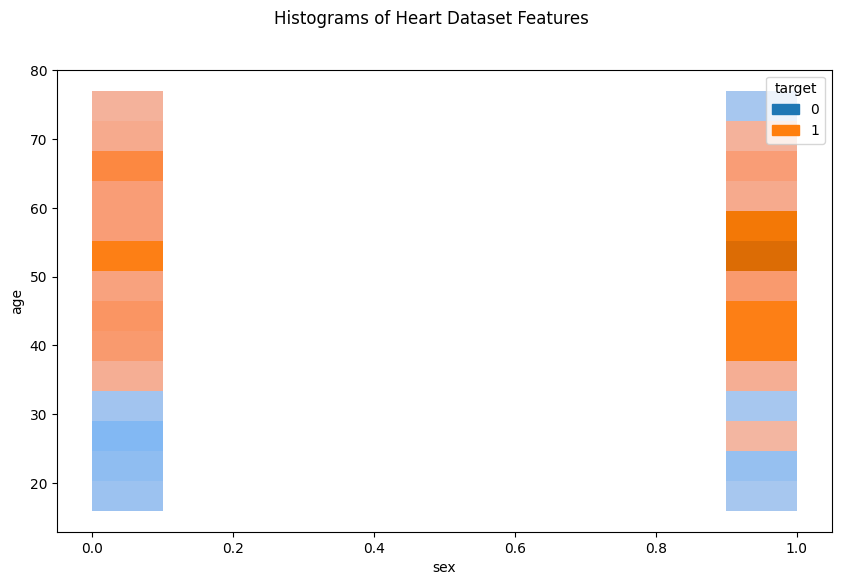

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(x='sex',y='age',hue='target',data=df)
plt.suptitle('Histograms of Heart Dataset Features')
plt.show()

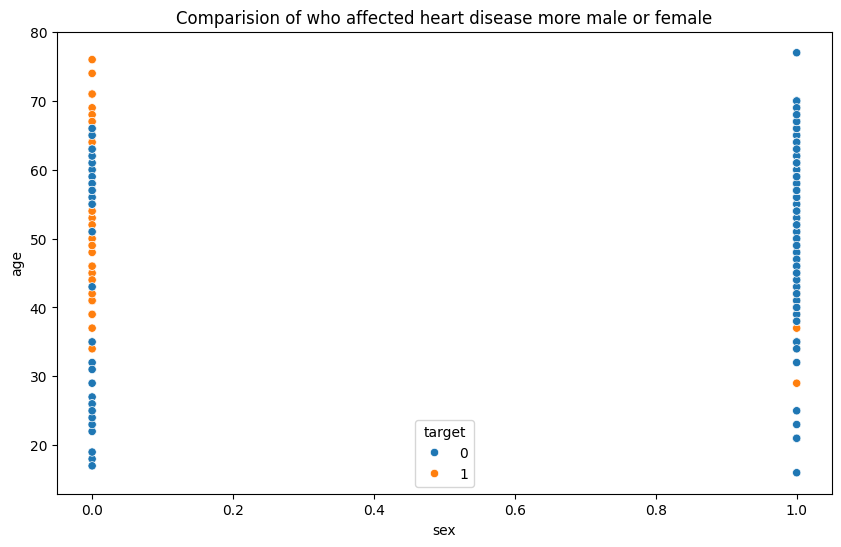

In [20]:
#Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sex', y='age', hue='target', data=df)
plt.title('Comparision of who affected heart disease more male or female')
plt.show()

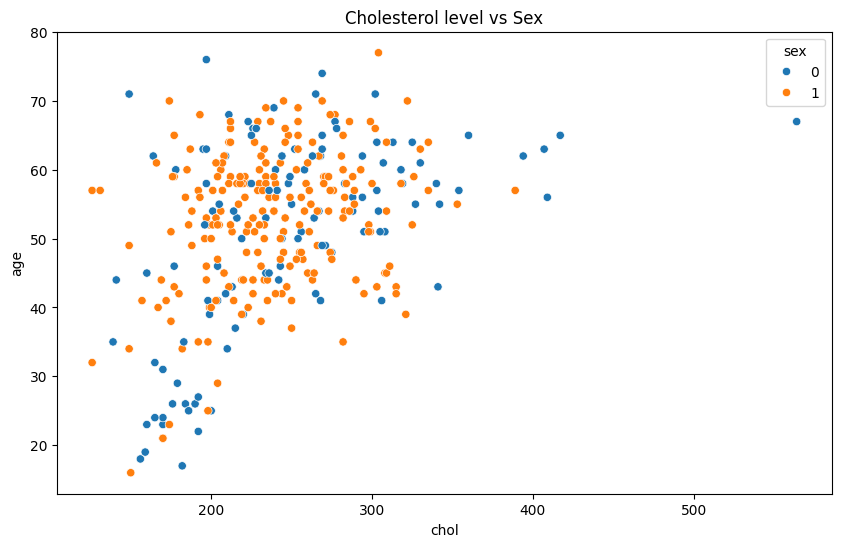

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='chol', y ='age', hue='sex',data=df)
plt.title('Cholesterol level vs Sex')
plt.show()


<Figure size 5000x1000 with 0 Axes>

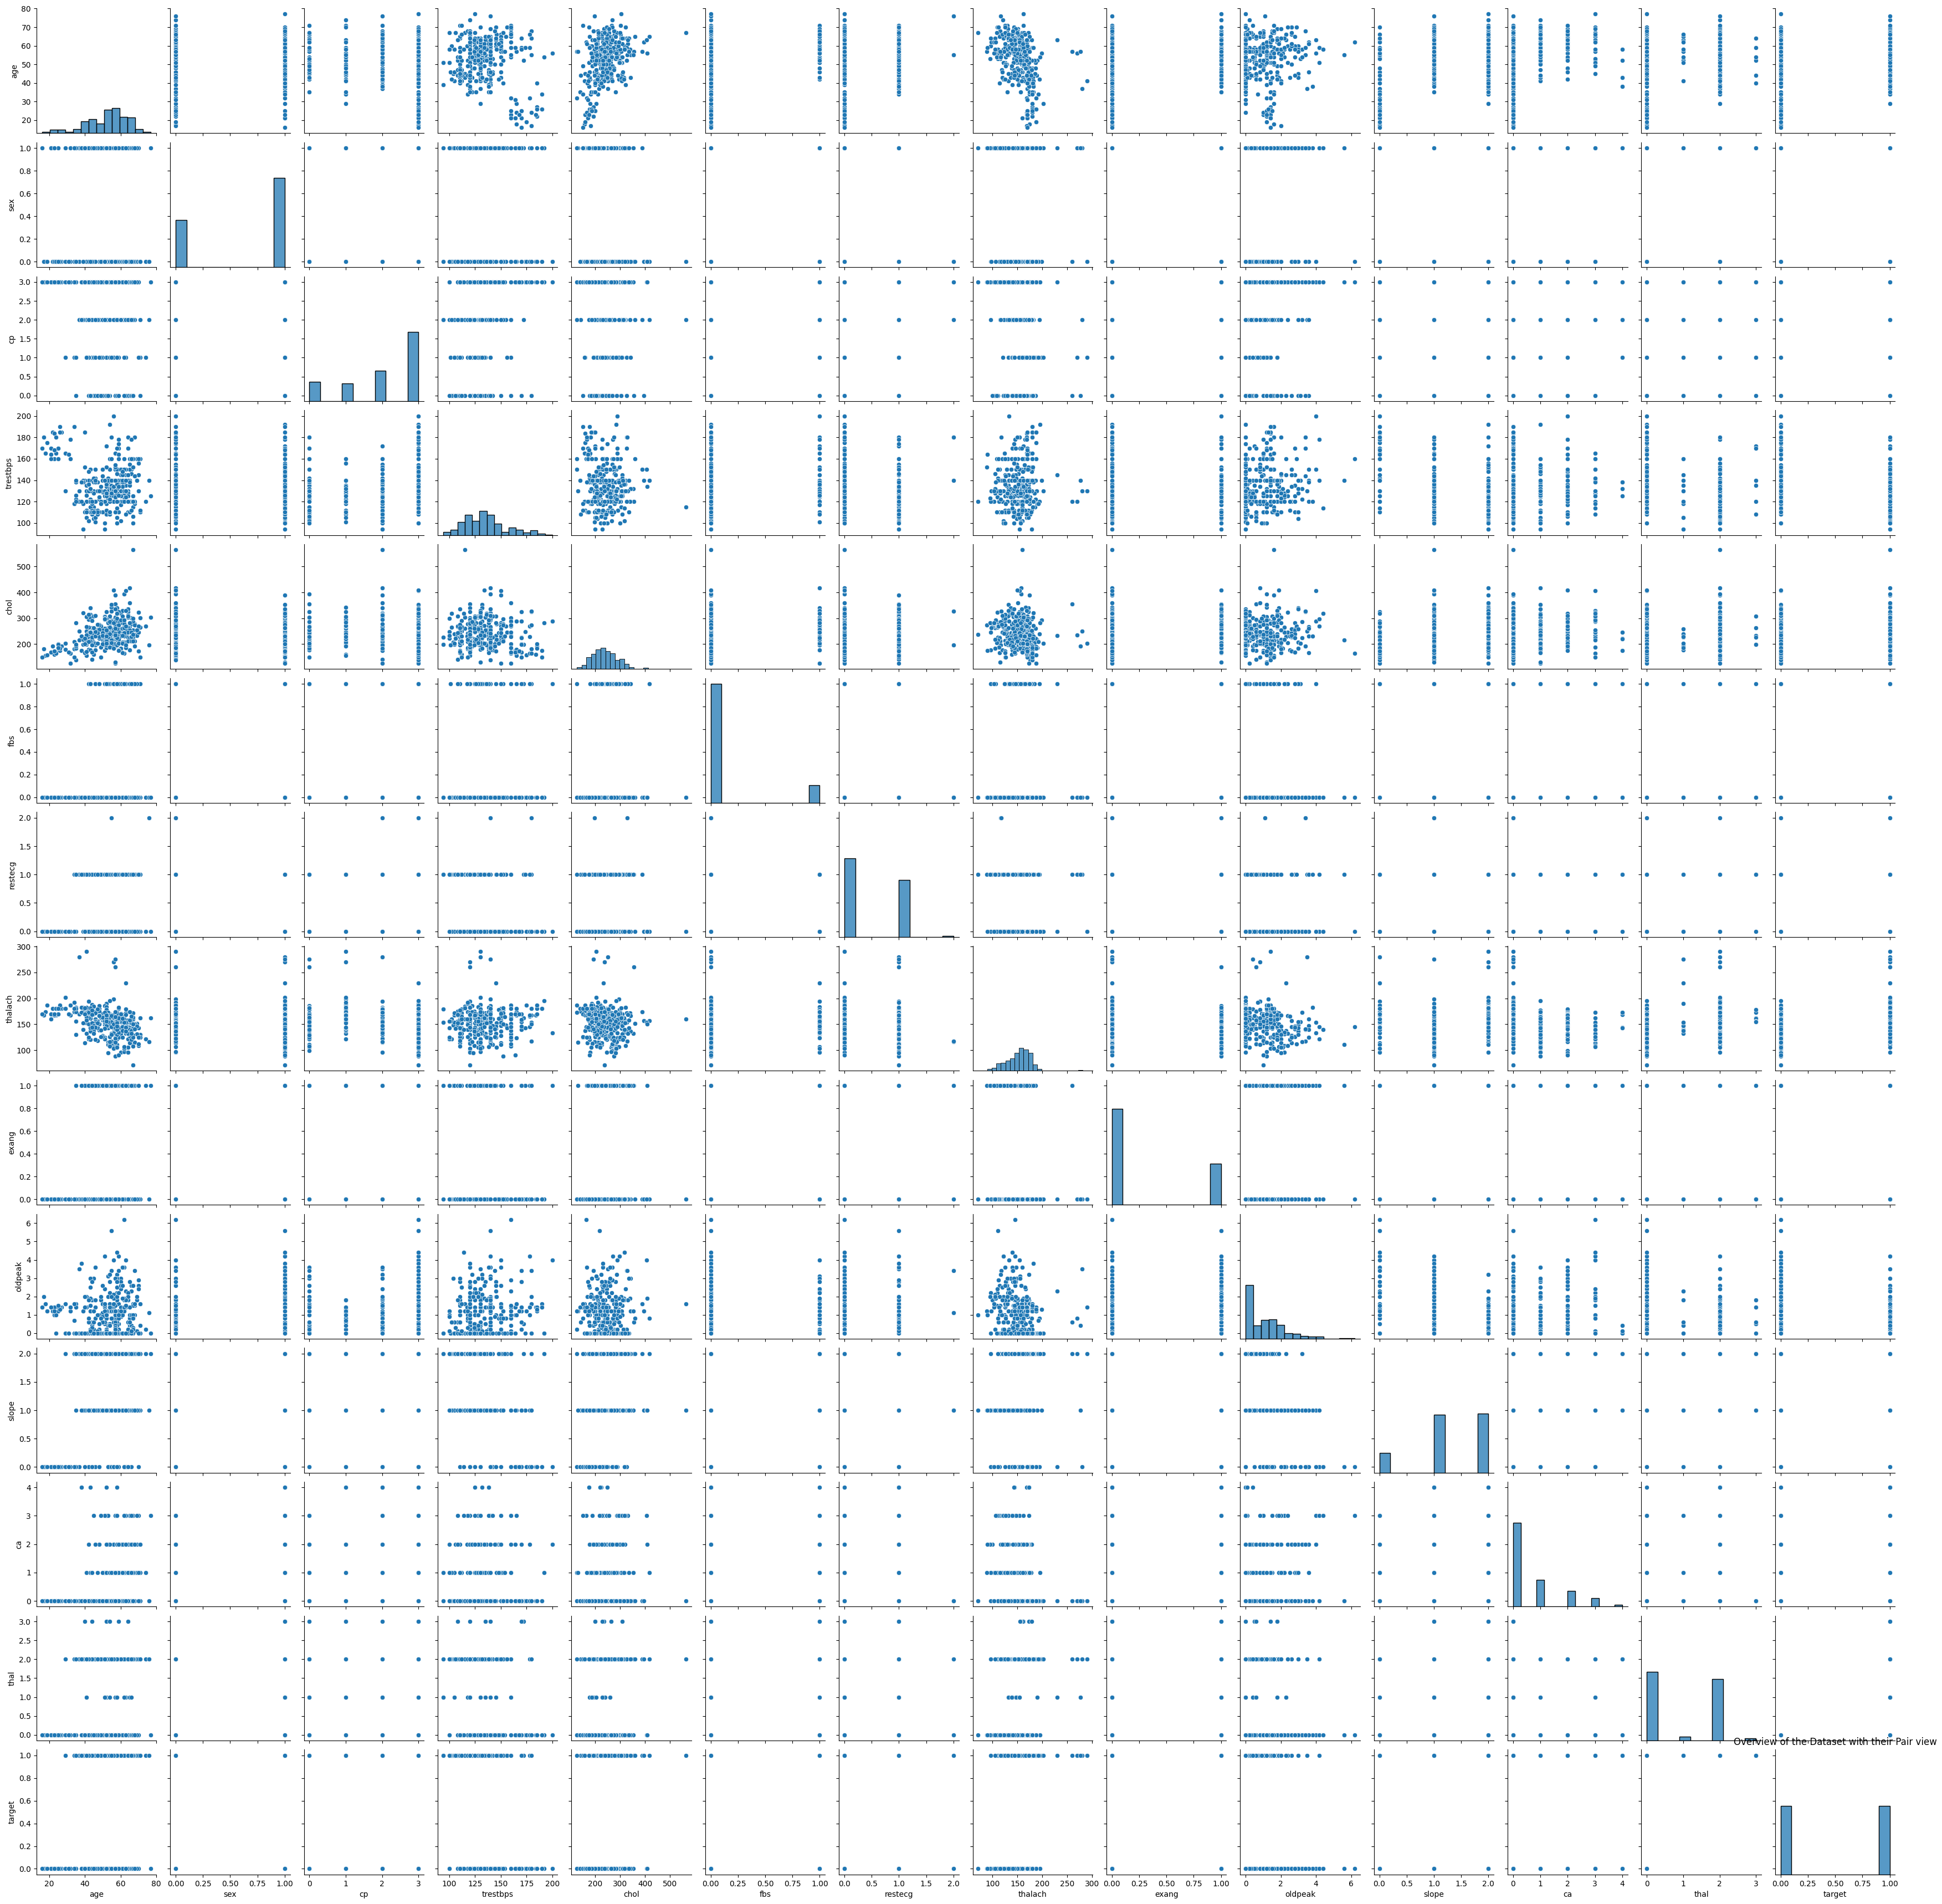

In [22]:
plt.figure(figsize=(50,10))
sns.pairplot(data=df)
plt.title('Overview of the Dataset with their Pair view')
plt.show()

Model creation

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [24]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [52]:
x= df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=df['target']

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=42)

In [54]:
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(x_train, y_train)

# Make predictions
y_predicts_lr = logistic_reg.predict(x_test)



In [55]:
print(f" Logistics Regression Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_lr):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_lr, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_lr, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_lr, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_lr))


 Logistics Regression Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        55

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [56]:
from sklearn.tree import DecisionTreeClassifier
Decision_tree=DecisionTreeClassifier()
Decision_tree.fit(x_train,y_train)
y_predicts_dt=Decision_tree.predict(x_test)
                 

In [57]:
print(f"{Decision_tree} Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_dt):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_dt, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_dt, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_dt, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_dt))


DecisionTreeClassifier() Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        55

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [59]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_predicts_knn=knn.predict(x_test)

In [60]:
print(f"{knn} Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_knn):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_knn, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_knn, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_knn, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_knn))


KNeighborsClassifier() Metrics:
Accuracy: 0.72
Precision: 0.72
Recall: 0.72
F1 Score: 0.72

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.73      0.70        44
           1       0.76      0.71      0.74        55

    accuracy                           0.72        99
   macro avg       0.72      0.72      0.72        99
weighted avg       0.72      0.72      0.72        99



In [63]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [64]:
svc_m=SVC(kernel='linear')
svc_m.fit(x_train,y_train)
y_predicts_svc=svc_m.predict(x_test)
svm_x=SVC

In [65]:
print(f"{svm_x} Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_svc):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_svc, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_svc, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_svc, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_svc))


<class 'sklearn.svm._classes.SVC'> Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        55

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [37]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [38]:
import xgboost as xgb

In [39]:
xgb_m=xgb.XGBClassifier()
xgb_m.fit(x_train,y_train)
y_predicts_xgb=svc_m.predict(x_test)
xgb_mo=print ('XGBoost')

XGBoost


In [40]:
print(f"{xgb_mo} Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_xgb):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_xgb, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_xgb, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_xgb, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_xgb))


None Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        34

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [66]:
from sklearn.ensemble import AdaBoostClassifier # For classification tasks

In [67]:
Ada_m=AdaBoostClassifier()
Ada_m.fit(x_train,y_train)
y_predicts_Ada=Ada_m.predict(x_test)


e:\ML Project\Heart Diease Prediction\py_pack\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [68]:
print(f"AdaBoostClassifier: Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_Ada):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_Ada, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_Ada, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_Ada, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_Ada))

AdaBoostClassifier: Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        55

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [69]:
from sklearn.ensemble import RandomForestClassifier


In [70]:
ran_m=RandomForestClassifier()
ran_m.fit(x_train,y_train)
y_predicts_ran=ran_m.predict(x_test)

In [71]:
print(f"AdaBoostClassifier: Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_ran):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_ran, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_ran, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_ran, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_ran))

AdaBoostClassifier: Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        55

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [72]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_predicts_nb= nb.predict(x_test)

In [48]:
print(f"AdaBoostClassifier: Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_nb, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_nb, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_nb, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_nb))

AdaBoostClassifier: Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        34

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



In [73]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_predicts_nb= nb.predict(x_test)

In [74]:
print(f"AdaBoostClassifier: Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_predicts_nb):.2f}")
print(f"Precision: {precision_score(y_test, y_predicts_nb, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_predicts_nb, average='weighted'):.2f}")
print(f"F1 Score: {f1_score(y_test, y_predicts_nb, average='weighted'):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_predicts_nb))

AdaBoostClassifier: Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        55

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



In [75]:
pk.dump(logistic_reg,open('model.pkl','wb'))